<h1>Exploratory Data Analytics for Machine Learning – Peer-graded Assignment – Lego sets

In [1]:
#Imports
%pylab inline
%config InlineBackend.figure_formats = ['retina']
import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Import data set
filepath = "data/lego_sets_data.csv"
data = pd.read_csv(filepath)
data.head()


,SetID,Number,Variant,Theme,Subtheme,Year,Name,Minifigs,Pieces,UKPrice,...,EUPrice,ImageURL,OwnedBy,WantedBy,Disney,Marvel,Star Wars,WB,Universal,Other or unknown media license
0,10160,21017,1,Architecture,Architect Series,2013,Imperial Hotel,NaN,1188.0,99.99,...,119.99,https://images.brickset.com/sets/images/21017-...,2988,2311,No,No,No,No,No,No
1,9284,21012,1,Architecture,Architect Series,2012,Sydney Opera House,NaN,270.0,34.99,...,NaN,https://images.brickset.com/sets/images/21012-...,3657,2174,No,No,No,No,No,No
2,9363,21014,1,Architecture,Architect Series,2012,Villa Savoye,NaN,660.0,59.99,...,69.99,https://images.brickset.com/sets/images/21014-...,3167,2010,No,No,No,No,No,No
3,8338,21007,1,Architecture,Architect Series,2011,Rockefeller Center,NaN,240.0,34.99,...,NaN,https://images.brickset.com/sets/images/21007-...,2668,2009,No,No,No,No,No,No
4,8721,21009,1,Architecture,Architect Series,2011,Farnsworth House,NaN,546.0,54.99,...,NaN,https://images.brickset.com/sets/images/21009-...,3149,2239,No,No,No,No,No,No


In [3]:
#Investigate the shapre and structure of our data

# Number of rows
print("Shape: ", data.shape[0])

# Column names
print("Column names: ", data.columns.tolist())

# Data types
print("Data types: "
      , data.dtypes)

Shape:  4722
Column names:  ['SetID', 'Number', 'Variant', 'Theme', 'Subtheme', 'Year', 'Name', 'Minifigs', 'Pieces', 'UKPrice', 'USPrice', 'CAPrice', 'EUPrice', 'ImageURL', 'OwnedBy', 'WantedBy', 'Disney', 'Marvel', 'Star Wars', 'WB', 'Universal', 'Other or unknown media license']
Data types:  SetID                               int64
Number                              int64
Variant                             int64
Theme                              object
Subtheme                           object
Year                                int64
Name                               object
Minifigs                          float64
Pieces                            float64
UKPrice                           float64
USPrice                           float64
CAPrice                           float64
EUPrice                           float64
ImageURL                           object
OwnedBy                             int64
WantedBy                           object
Disney                          

In [4]:
data.WantedBy.value_counts()

No      45
81      11
82      10
67      10
673     10
        ..
1930     1
2167     1
3266     1
2128     1
6318     1
Name: WantedBy, Length: 2066, dtype: int64

In [5]:
#'WantedBy' by should be numerical - so we will change to int64 field type
#First we note some values are set to 'No' - these should be zero values
data['WantedBy'] = data['WantedBy'].replace('No', 0)

data['WantedBy'] = pd.to_numeric(data['WantedBy'])
print("Data types: "
      , data.dtypes)

Data types:  SetID                               int64
Number                              int64
Variant                             int64
Theme                              object
Subtheme                           object
Year                                int64
Name                               object
Minifigs                          float64
Pieces                            float64
UKPrice                           float64
USPrice                           float64
CAPrice                           float64
EUPrice                           float64
ImageURL                           object
OwnedBy                             int64
WantedBy                            int64
Disney                             object
Marvel                             object
Star Wars                          object
WB                                 object
Universal                          object
Other or unknown media license     object
dtype: object


In [6]:
data.Variant.value_counts()

1     4139
2       58
3       45
4       44
5       44
6       41
8       34
9       34
7       34
10      33
11      32
12      32
14      31
16      31
15      31
13      31
17       8
18       7
19       6
20       5
22       1
21       1
Name: Variant, dtype: int64

In [7]:
print("Unique IDs = ", len(data.SetID.unique()), " - which is the same as the number of rows, so this is just an identifier")

Unique IDs =  4722  - which is the same as the number of rows, so this is just an identifier


In [8]:
print("Unique IDs = ", len(data.Number.unique()), " - which is not the same as the number of rows, so this is not an identifier on it's own. Let's consider it, alongside the 'variant' column.")

Unique IDs =  4157  - which is not the same as the number of rows, so this is not an identifier on it's own. Let's consider it, alongside the 'variant' column.


In [9]:
data['num_var'] = data[['Number', 'Variant']].astype(str).agg('-'.join, axis=1)

In [10]:
data.num_var.value_counts()

2282-1       1
4641-1       1
40375-1      1
40312-1      1
4000018-1    1
            ..
9209-1       1
8804-12      1
42070-1      1
75098-1      1
71022-11     1
Name: num_var, Length: 4722, dtype: int64

In [11]:
print("num_var's = ", len(data.num_var.unique()), " - which is the same as the number of rows, so this is just an identifier")

num_var's =  4722  - which is the same as the number of rows, so this is just an identifier


In [12]:
#We can therefore drop thse fields: SetID, Number, Variant and the addtional field num_var we added
#We can also remove the image file, as we cannot learn anything from that

#First make a copy of our raw data to use

df = data.copy()


In [13]:
df = df.drop(['num_var', 'SetID', 'Number', 'Variant', 'ImageURL', 'Name'], axis=1)


In [14]:
df.head()

,Theme,Subtheme,Year,Minifigs,Pieces,UKPrice,USPrice,CAPrice,EUPrice,OwnedBy,WantedBy,Disney,Marvel,Star Wars,WB,Universal,Other or unknown media license
0,Architecture,Architect Series,2013,NaN,1188.0,99.99,129.99,159.99,119.99,2988,2311,No,No,No,No,No,No
1,Architecture,Architect Series,2012,NaN,270.0,34.99,39.99,49.99,NaN,3657,2174,No,No,No,No,No,No
2,Architecture,Architect Series,2012,NaN,660.0,59.99,69.99,89.99,69.99,3167,2010,No,No,No,No,No,No
3,Architecture,Architect Series,2011,NaN,240.0,34.99,39.99,49.99,NaN,2668,2009,No,No,No,No,No,No
4,Architecture,Architect Series,2011,NaN,546.0,54.99,59.99,69.99,NaN,3149,2239,No,No,No,No,No,No


In [15]:
stats_df = df.describe()
stats_df

,Year,Minifigs,Pieces,UKPrice,USPrice,CAPrice,EUPrice,OwnedBy,WantedBy
count,4722.000000,3267.000000,4604.000000,3728.000000,3994.000000,3318.000000,2465.000000,4722.000000,4722.000000
mean,2015.758789,2.704316,293.743484,32.312465,35.731345,51.659385,43.797339,3154.490258,983.583227
std,2.787703,2.562290,525.535523,44.918260,52.585136,66.359525,56.658021,2959.475950,964.223621
min,2011.000000,1.000000,1.000000,0.000000,0.000000,2.490000,0.010000,0.000000,0.000000
25%,2013.000000,1.000000,40.750000,8.990000,9.990000,14.990000,14.990000,789.250000,356.000000
50%,2016.000000,2.000000,115.000000,17.990000,19.990000,29.990000,26.990000,2345.000000,685.500000
75%,2018.000000,4.000000,333.000000,39.990000,39.990000,59.990000,49.990000,4745.500000,1322.500000
max,2020.000000,32.000000,9035.000000,649.990000,799.990000,899.990000,779.820000,24400.000000,9651.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4722 entries, 0 to 4721
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Theme                           4722 non-null   object 
 1   Subtheme                        3488 non-null   object 
 2   Year                            4722 non-null   int64  
 3   Minifigs                        3267 non-null   float64
 4   Pieces                          4604 non-null   float64
 5   UKPrice                         3728 non-null   float64
 6   USPrice                         3994 non-null   float64
 7   CAPrice                         3318 non-null   float64
 8   EUPrice                         2465 non-null   float64
 9   OwnedBy                         4722 non-null   int64  
 10  WantedBy                        4722 non-null   int64  
 11  Disney                          4722 non-null   object 
 12  Marvel                          47

In [17]:
no_minfigs = df[df['Minifigs'].isna()]

In [18]:
no_minfigs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 4721
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Theme                           1455 non-null   object 
 1   Subtheme                        916 non-null    object 
 2   Year                            1455 non-null   int64  
 3   Minifigs                        0 non-null      float64
 4   Pieces                          1362 non-null   float64
 5   UKPrice                         971 non-null    float64
 6   USPrice                         1007 non-null   float64
 7   CAPrice                         896 non-null    float64
 8   EUPrice                         640 non-null    float64
 9   OwnedBy                         1455 non-null   int64  
 10  WantedBy                        1455 non-null   int64  
 11  Disney                          1455 non-null   object 
 12  Marvel                          14

In [19]:
pd.set_option('display.max_rows', no_minfigs.shape[0]+1)
#print(no_minfigs)

In [20]:
# If we were to apply the above cell, we could see that many of the sets legitimately don't have any minifigures - we should therefore set NaN to 0

df['Minifigs'] = df['Minifigs'].replace([NaN],0)

# We can also see there are many promotional sets under the categories of 'Promotional' and 'Miscellaneous'.
# These are not true Lego sets, but sets not sold and given away as gifts with purchases, to Lego staff, or to people on special visits to Lego properties.
# We should also remove these sets from our data set

index_names = df[ df['Theme'] == 'Promotional' ].index
df.drop(index_names, inplace = True)
index_names2 = df[ df['Theme'] == 'Miscellaneous' ].index
df.drop(index_names2, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4492 entries, 0 to 4721
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Theme                           4492 non-null   object 
 1   Subtheme                        3290 non-null   object 
 2   Year                            4492 non-null   int64  
 3   Minifigs                        4492 non-null   float64
 4   Pieces                          4387 non-null   float64
 5   UKPrice                         3673 non-null   float64
 6   USPrice                         3935 non-null   float64
 7   CAPrice                         3302 non-null   float64
 8   EUPrice                         2449 non-null   float64
 9   OwnedBy                         4492 non-null   int64  
 10  WantedBy                        4492 non-null   int64  
 11  Disney                          4492 non-null   object 
 12  Marvel                          44

In [22]:
no_piece_count = df[df['Pieces'].isna()]
pd.set_option('display.max_rows', no_piece_count.shape[0]+1)
#print(no_piece_count)

In [23]:
#The above code will show us that the sets without piece counts are across a range of themes. Most appear to just be missing from the database.
# As we cannot easily get the piece counts, we will have to remove these lines, as it is not possible to estimate them

index_names = df[ df['Pieces'].isna()].index
df.drop(index_names, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4387 entries, 0 to 4721
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Theme                           4387 non-null   object 
 1   Subtheme                        3234 non-null   object 
 2   Year                            4387 non-null   int64  
 3   Minifigs                        4387 non-null   float64
 4   Pieces                          4387 non-null   float64
 5   UKPrice                         3665 non-null   float64
 6   USPrice                         3920 non-null   float64
 7   CAPrice                         3296 non-null   float64
 8   EUPrice                         2442 non-null   float64
 9   OwnedBy                         4387 non-null   int64  
 10  WantedBy                        4387 non-null   int64  
 11  Disney                          4387 non-null   object 
 12  Marvel                          43

In [24]:
# The null values in the column 'Other or unknown media license' are a mistake and should be set to 'No'

df['Other or unknown media license'] = df['Other or unknown media license'].replace([NaN],'No')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4387 entries, 0 to 4721
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Theme                           4387 non-null   object 
 1   Subtheme                        3234 non-null   object 
 2   Year                            4387 non-null   int64  
 3   Minifigs                        4387 non-null   float64
 4   Pieces                          4387 non-null   float64
 5   UKPrice                         3665 non-null   float64
 6   USPrice                         3920 non-null   float64
 7   CAPrice                         3296 non-null   float64
 8   EUPrice                         2442 non-null   float64
 9   OwnedBy                         4387 non-null   int64  
 10  WantedBy                        4387 non-null   int64  
 11  Disney                          4387 non-null   object 
 12  Marvel                          43

In [25]:
no_prices = df[ (df['UKPrice'].isna()) & (df['CAPrice'].isna()) & (df['USPrice'].isna()) & (df['EUPrice'].isna())]
pd.set_option('display.max_rows', no_prices.shape[0]+1)
#print(no_prices)

In [26]:
#The above will show us a list of sets without prices
#Reviewing them shows that many are actually promotional sets, rather than proper sets, so should be removed
#A few may be actual sets that simply do not have any prices in the database.
#It would be ideal to either identify the price, or work out an average based on other sets in the same theme.
#However, it is not possible to easily find prices, nor is it possible to know which are promotional sets and which have missing prices without extensive work
#We will therefore remove these rows

index_names = df[ (df['UKPrice'].isna()) & (df['CAPrice'].isna()) & (df['USPrice'].isna()) & (df['EUPrice'].isna())].index
df.drop(index_names, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 4721
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Theme                           3982 non-null   object 
 1   Subtheme                        2957 non-null   object 
 2   Year                            3982 non-null   int64  
 3   Minifigs                        3982 non-null   float64
 4   Pieces                          3982 non-null   float64
 5   UKPrice                         3665 non-null   float64
 6   USPrice                         3920 non-null   float64
 7   CAPrice                         3296 non-null   float64
 8   EUPrice                         2442 non-null   float64
 9   OwnedBy                         3982 non-null   int64  
 10  WantedBy                        3982 non-null   int64  
 11  Disney                          3982 non-null   object 
 12  Marvel                          39

In [27]:
no_prices = df[ (df['USPrice'].isna())]
pd.set_option('display.max_rows', no_prices.shape[0]+1)
#print(no_prices)

In [28]:
#identify the US / UK price ratio for as many sets as possible
df['uk_us_con'] =  df['USPrice']/df['UKPrice']
df.head()

,Theme,Subtheme,Year,Minifigs,Pieces,UKPrice,USPrice,CAPrice,EUPrice,OwnedBy,WantedBy,Disney,Marvel,Star Wars,WB,Universal,Other or unknown media license,uk_us_con
0,Architecture,Architect Series,2013,0.0,1188.0,99.99,129.99,159.99,119.99,2988,2311,No,No,No,No,No,No,1.300030
1,Architecture,Architect Series,2012,0.0,270.0,34.99,39.99,49.99,NaN,3657,2174,No,No,No,No,No,No,1.142898
2,Architecture,Architect Series,2012,0.0,660.0,59.99,69.99,89.99,69.99,3167,2010,No,No,No,No,No,No,1.166694
3,Architecture,Architect Series,2011,0.0,240.0,34.99,39.99,49.99,NaN,2668,2009,No,No,No,No,No,No,1.142898
4,Architecture,Architect Series,2011,0.0,546.0,54.99,59.99,69.99,NaN,3149,2239,No,No,No,No,No,No,1.090926


In [29]:
#Work out the average exchange rate each year and add to a dataframe

avg_uk_us = df.groupby('Year')['uk_us_con'].mean().reset_index()
avg_uk_us

,Year,uk_us_con
0,2011,1.266936
1,2012,1.284753
2,2013,1.294088
3,2014,1.263866
4,2015,2.444019
5,2016,1.249312
6,2017,1.156006
7,2018,1.127450
8,2019,1.159499
9,2020,1.138907


In [30]:
#merge this data in to the original dataframe, so each row, even those with a missing US or UK price has a value
df = df.merge(avg_uk_us, on=['Year'])
df.head(-40)

,Theme,Subtheme,Year,Minifigs,Pieces,UKPrice,USPrice,CAPrice,EUPrice,OwnedBy,WantedBy,Disney,Marvel,Star Wars,WB,Universal,Other or unknown media license,uk_us_con_x,uk_us_con_y
0,Architecture,Architect Series,2013,0.0,1188.0,99.99,129.99,159.99,119.99,2988,2311,No,No,No,No,No,No,1.300030,1.294088
1,Architecture,Landmark Series,2013,0.0,345.0,29.99,34.99,44.99,34.99,4592,2204,No,No,No,No,No,No,1.166722,1.294088
2,Architecture,Landmark Series,2013,0.0,597.0,49.99,49.99,59.99,49.99,4013,2269,No,No,No,No,No,No,1.000000,1.294088
3,Architecture,NaN,2013,0.0,1210.0,159.99,159.99,NaN,159.99,2743,1864,No,No,No,No,No,No,1.000000,1.294088
4,Bricks and More,NaN,2013,3.0,197.0,14.99,19.99,24.99,NaN,714,239,No,No,No,No,No,No,1.333556,1.294088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,Technic,NaN,2014,0.0,948.0,59.99,79.99,99.99,69.99,3389,1634,No,No,No,No,No,No,1.333389,1.263866
3938,Technic,NaN,2014,0.0,1297.0,109.99,139.99,159.99,119.99,5083,2394,No,No,No,No,No,No,1.272752,1.263866
3939,Technic,NaN,2014,0.0,137.0,17.99,19.99,24.99,19.99,3337,588,No,No,No,No,No,No,1.111173,1.263866
3940,Technic,NaN,2014,0.0,148.0,17.99,19.99,24.99,19.99,3205,591,No,No,No,No,No,No,1.111173,1.263866


In [31]:
df['USPrice'].fillna(df['UKPrice'] * df['uk_us_con_y'], inplace = True) 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 3981
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Theme                           3982 non-null   object 
 1   Subtheme                        2957 non-null   object 
 2   Year                            3982 non-null   int64  
 3   Minifigs                        3982 non-null   float64
 4   Pieces                          3982 non-null   float64
 5   UKPrice                         3665 non-null   float64
 6   USPrice                         3980 non-null   float64
 7   CAPrice                         3296 non-null   float64
 8   EUPrice                         2442 non-null   float64
 9   OwnedBy                         3982 non-null   int64  
 10  WantedBy                        3982 non-null   int64  
 11  Disney                          3982 non-null   object 
 12  Marvel                          39

In [33]:
#The above has given us US values in all but two columns now
#Let's try and do the same for the remaining null price values for different countries using the US set of data


In [34]:
#identify the US / CA price ratio for as many sets as possible
df['us_ca_con'] =  df['CAPrice']/df['USPrice']
df.head()


,Theme,Subtheme,Year,Minifigs,Pieces,UKPrice,USPrice,CAPrice,EUPrice,OwnedBy,WantedBy,Disney,Marvel,Star Wars,WB,Universal,Other or unknown media license,uk_us_con_x,uk_us_con_y,us_ca_con
0,Architecture,Architect Series,2013,0.0,1188.0,99.99,129.99,159.99,119.99,2988,2311,No,No,No,No,No,No,1.300030,1.294088,1.230787
1,Architecture,Landmark Series,2013,0.0,345.0,29.99,34.99,44.99,34.99,4592,2204,No,No,No,No,No,No,1.166722,1.294088,1.285796
2,Architecture,Landmark Series,2013,0.0,597.0,49.99,49.99,59.99,49.99,4013,2269,No,No,No,No,No,No,1.000000,1.294088,1.200040
3,Architecture,NaN,2013,0.0,1210.0,159.99,159.99,NaN,159.99,2743,1864,No,No,No,No,No,No,1.000000,1.294088,NaN
4,Bricks and More,NaN,2013,3.0,197.0,14.99,19.99,24.99,NaN,714,239,No,No,No,No,No,No,1.333556,1.294088,1.250125


In [35]:
#Work out the average exchange rate each year and add to a dataframe

avg_us_ca = df.groupby('Year')['us_ca_con'].mean().reset_index()
avg_us_ca

,Year,us_ca_con
0,2011,1.265221
1,2012,1.265941
2,2013,1.245966
3,2014,1.238078
4,2015,1.222715
5,2016,1.245653
6,2017,1.247422
7,2018,1.256696
8,2019,1.312125
9,2020,1.329938


In [36]:
df = df.merge(avg_us_ca, on=['Year'])

In [37]:
df['CAPrice'].fillna(df['USPrice'] * df['us_ca_con_y'], inplace = True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 3981
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Theme                           3982 non-null   object 
 1   Subtheme                        2957 non-null   object 
 2   Year                            3982 non-null   int64  
 3   Minifigs                        3982 non-null   float64
 4   Pieces                          3982 non-null   float64
 5   UKPrice                         3665 non-null   float64
 6   USPrice                         3980 non-null   float64
 7   CAPrice                         3980 non-null   float64
 8   EUPrice                         2442 non-null   float64
 9   OwnedBy                         3982 non-null   int64  
 10  WantedBy                        3982 non-null   int64  
 11  Disney                          3982 non-null   object 
 12  Marvel                          39

In [39]:
#Do for the EU prices, based on US prices

df['us_eu_con'] =  df['EUPrice']/df['USPrice']
avg_us_eu = df.groupby('Year')['us_eu_con'].mean().reset_index()
df = df.merge(avg_us_eu, on=['Year'])
df['EUPrice'].fillna(df['USPrice'] * df['us_eu_con_y'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 3981
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Theme                           3982 non-null   object 
 1   Subtheme                        2957 non-null   object 
 2   Year                            3982 non-null   int64  
 3   Minifigs                        3982 non-null   float64
 4   Pieces                          3982 non-null   float64
 5   UKPrice                         3665 non-null   float64
 6   USPrice                         3980 non-null   float64
 7   CAPrice                         3980 non-null   float64
 8   EUPrice                         3982 non-null   float64
 9   OwnedBy                         3982 non-null   int64  
 10  WantedBy                        3982 non-null   int64  
 11  Disney                          3982 non-null   object 
 12  Marvel                          39

In [40]:
#Do for the UK prices, based on US prices

df['us_uk_con'] =  df['UKPrice']/df['USPrice']
avg_us_uk = df.groupby('Year')['us_uk_con'].mean().reset_index()
df = df.merge(avg_us_uk, on=['Year'])
df['UKPrice'].fillna(df['USPrice'] * df['us_uk_con_y'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 3981
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Theme                           3982 non-null   object 
 1   Subtheme                        2957 non-null   object 
 2   Year                            3982 non-null   int64  
 3   Minifigs                        3982 non-null   float64
 4   Pieces                          3982 non-null   float64
 5   UKPrice                         3980 non-null   float64
 6   USPrice                         3980 non-null   float64
 7   CAPrice                         3980 non-null   float64
 8   EUPrice                         3982 non-null   float64
 9   OwnedBy                         3982 non-null   int64  
 10  WantedBy                        3982 non-null   int64  
 11  Disney                          3982 non-null   object 
 12  Marvel                          39

In [41]:
#Finally we deal with the remaining two rows with no US, UK or CA price

df['eu_uk_con'] =  df['UKPrice']/df['EUPrice']
avg_eu_uk = df.groupby('Year')['eu_uk_con'].mean().reset_index()
df = df.merge(avg_eu_uk, on=['Year'])
df['UKPrice'].fillna(df['EUPrice'] * df['eu_uk_con_y'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 3981
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Theme                           3982 non-null   object 
 1   Subtheme                        2957 non-null   object 
 2   Year                            3982 non-null   int64  
 3   Minifigs                        3982 non-null   float64
 4   Pieces                          3982 non-null   float64
 5   UKPrice                         3982 non-null   float64
 6   USPrice                         3980 non-null   float64
 7   CAPrice                         3980 non-null   float64
 8   EUPrice                         3982 non-null   float64
 9   OwnedBy                         3982 non-null   int64  
 10  WantedBy                        3982 non-null   int64  
 11  Disney                          3982 non-null   object 
 12  Marvel                          39

In [42]:
df['eu_us_con'] =  df['USPrice']/df['EUPrice']
avg_eu_us = df.groupby('Year')['eu_us_con'].mean().reset_index()
df = df.merge(avg_eu_us, on=['Year'])
df['USPrice'].fillna(df['EUPrice'] * df['eu_us_con_y'], inplace = True)

df['eu_ca_con'] =  df['CAPrice']/df['EUPrice']
avg_eu_ca = df.groupby('Year')['eu_ca_con'].mean().reset_index()
df = df.merge(avg_eu_ca, on=['Year'])
df['CAPrice'].fillna(df['EUPrice'] * df['eu_ca_con_y'], inplace = True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 3981
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Theme                           3982 non-null   object 
 1   Subtheme                        2957 non-null   object 
 2   Year                            3982 non-null   int64  
 3   Minifigs                        3982 non-null   float64
 4   Pieces                          3982 non-null   float64
 5   UKPrice                         3982 non-null   float64
 6   USPrice                         3982 non-null   float64
 7   CAPrice                         3982 non-null   float64
 8   EUPrice                         3982 non-null   float64
 9   OwnedBy                         3982 non-null   int64  
 10  WantedBy                        3982 non-null   int64  
 11  Disney                          3982 non-null   object 
 12  Marvel                          39

In [43]:
#We can now drop our working columns
df = df.drop(['uk_us_con_x', 'uk_us_con_y', 'us_ca_con_x', 'us_ca_con_y', 'us_eu_con_x', 'us_eu_con_y', 'us_uk_con_x', 'us_uk_con_y',
              'eu_uk_con_x', 'eu_uk_con_y', 'eu_us_con_x', 'eu_us_con_y', 'eu_ca_con_x', 'eu_ca_con_y'], axis=1)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 3981
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Theme                           3982 non-null   object 
 1   Subtheme                        2957 non-null   object 
 2   Year                            3982 non-null   int64  
 3   Minifigs                        3982 non-null   float64
 4   Pieces                          3982 non-null   float64
 5   UKPrice                         3982 non-null   float64
 6   USPrice                         3982 non-null   float64
 7   CAPrice                         3982 non-null   float64
 8   EUPrice                         3982 non-null   float64
 9   OwnedBy                         3982 non-null   int64  
 10  WantedBy                        3982 non-null   int64  
 11  Disney                          3982 non-null   object 
 12  Marvel                          39

In [44]:
#Now all our rows have 3982 except for Subtheme - it is very possible for there to be no subtheme. Therefore, we will replace these null values with a 'None' categorical value.

df['Subtheme'].fillna('None', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 3981
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Theme                           3982 non-null   object 
 1   Subtheme                        3982 non-null   object 
 2   Year                            3982 non-null   int64  
 3   Minifigs                        3982 non-null   float64
 4   Pieces                          3982 non-null   float64
 5   UKPrice                         3982 non-null   float64
 6   USPrice                         3982 non-null   float64
 7   CAPrice                         3982 non-null   float64
 8   EUPrice                         3982 non-null   float64
 9   OwnedBy                         3982 non-null   int64  
 10  WantedBy                        3982 non-null   int64  
 11  Disney                          3982 non-null   object 
 12  Marvel                          39

In [45]:
#Next, note Disney, Marvel, Star Wars, WB, Universal and 'Other or unknown media license' are binary options between yes and no.
#We will use Binary Encoding to convert these columns in to numeric values, with yes = 1 and no = 0


df = df.replace({'Disney' : { "Yes" :1, "No" : 0}})
df = df.replace({'Marvel' : { "Yes" :1, "No" : 0}})
df = df.replace({'Star Wars' : { "Yes" :1, "No" : 0}})
df = df.replace({'WB' : { "Yes" :1, "No" : 0}})
df = df.replace({'Universal' : { "Yes" :1, "No" : 0}})
df = df.replace({'Other or unknown media license' : { "Yes" :1, "No" : 0}})


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 3981
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Theme                           3982 non-null   object 
 1   Subtheme                        3982 non-null   object 
 2   Year                            3982 non-null   int64  
 3   Minifigs                        3982 non-null   float64
 4   Pieces                          3982 non-null   float64
 5   UKPrice                         3982 non-null   float64
 6   USPrice                         3982 non-null   float64
 7   CAPrice                         3982 non-null   float64
 8   EUPrice                         3982 non-null   float64
 9   OwnedBy                         3982 non-null   int64  
 10  WantedBy                        3982 non-null   int64  
 11  Disney                          3982 non-null   int64  
 12  Marvel                          39

In [46]:
df.head()

,Theme,Subtheme,Year,Minifigs,Pieces,UKPrice,USPrice,CAPrice,EUPrice,OwnedBy,WantedBy,Disney,Marvel,Star Wars,WB,Universal,Other or unknown media license
0,Architecture,Architect Series,2013,0.0,1188.0,99.99,129.99,159.990000,119.990000,2988,2311,0,0,0,0,0,0
1,Architecture,Landmark Series,2013,0.0,345.0,29.99,34.99,44.990000,34.990000,4592,2204,0,0,0,0,0,0
2,Architecture,Landmark Series,2013,0.0,597.0,49.99,49.99,59.990000,49.990000,4013,2269,0,0,0,0,0,0
3,Architecture,None,2013,0.0,1210.0,159.99,159.99,199.342139,159.990000,2743,1864,0,0,0,0,0,0
4,Bricks and More,None,2013,3.0,197.0,14.99,19.99,24.990000,19.336961,714,239,0,0,0,0,0,0


In [47]:
#Now let's look at themes and subthemes


theme_counts = df.Theme.value_counts()
theme_counts

Collectable Minifigures    518
Star Wars                  347
City                       330
Friends                    276
Duplo                      276
                          ... 
Ghostbusters                 2
Boost                        1
FORMA                        1
Stranger Things              1
Make and Create              1
Name: Theme, Length: 81, dtype: int64

In [48]:
#Let's group any themes with less than 10 rows in to an 'Other theme' category

other_theme = list(theme_counts[theme_counts <= 5].index)

other_theme

['Scooby-Doo',
 'Master Builder Academy',
 'Atlantis',
 'SpongeBob SquarePants',
 'LEGO Art',
 'Fusion',
 'Brick Sketches',
 'Power Functions',
 'Life of George',
 'Serious Play',
 'The Simpsons',
 'The Powerpuff Girls',
 'Minions: The Rise of Gru',
 'Ghostbusters',
 'Boost',
 'FORMA',
 'Stranger Things',
 'Make and Create']

In [49]:
#Let's group any themes with less than 10 rows in to an 'Other theme' category

df['Theme'] = df['Theme'].replace(other_theme, 'Other theme')

In [50]:
df['Theme'].value_counts()

Collectable Minifigures    518
Star Wars                  347
City                       330
Duplo                      276
Friends                    276
                          ... 
The Lone Ranger              7
Pirates                      6
The Angry Birds Movie        6
Pharaoh's Quest              6
Toy Story                    6
Name: Theme, Length: 64, dtype: int64

In [51]:
#Let's repeat for subthemes
subtheme_counts = df.Subtheme.value_counts()
subtheme_counts

None              1025
Seasonal            50
Great Vehicles      48
Minifig-scale       46
Police              46
                  ... 
Black Widow          1
Aircraft             1
Basic Set            1
Monkie Kid           1
Ghostbusters         1
Name: Subtheme, Length: 330, dtype: int64

In [52]:
other_sub_theme = list(subtheme_counts[subtheme_counts <= 5].index)

other_sub_theme

['Medical',
 'Battle Suits',
 'Dog Show',
 'Prisoner of Azkaban',
 'Snow Resort',
 'Fairground',
 'Harbour',
 'Building Bigger Thinking',
 'Kingdoms',
 'Modular',
 'Jurassic World: Fallen Kingdom',
 'Ford',
 'Day of the Departed',
 'Heroica',
 'Bigfigs',
 'Comics',
 'On Stranger Tides',
 'Legends',
 'Dragon Masters',
 'Legend Beasts',
 'Moana',
 'Disney Planes',
 'McLaren',
 'Search for the Fang Blades',
 'The Mandalorian',
 'Tribe Packs',
 'NASA',
 'Forest Animals',
 'Ninjago',
 'Storybook Adventures',
 'Forest Fire',
 'Tiny Turbos',
 'Battlefront',
 'Goblet of Fire',
 'Spinjitzu Slam',
 'Buildings',
 'Power-Up Pack',
 'Captain America: Civil War',
 'Mini Building Set',
 'The Old Republic',
 'Sleeping Beauty',
 '2 in 1',
 'Avengers Assemble',
 'Cargo',
 '4 Plus',
 'Wizarding World',
 'The Battle of the Five Armies',
 'The Two Towers',
 'Girl',
 'Spider-Man: Far From Home',
 'The Dark Knight Trilogy',
 'Winnie the Pooh',
 'Helmet Collection',
 'Doc McStuffins',
 'Adventure Camp',
 'Sto

In [53]:
df['Subtheme'] = df['Subtheme'].replace(other_sub_theme, 'Other subtheme')
df['Subtheme'].value_counts()

None                     1025
Other subtheme            399
Seasonal                   50
Great Vehicles             48
Police                     46
                         ... 
The Final Battle            6
An Unexpected Journey       6
Avengers: Endgame           6
Volcano Explorers           6
Thanksgiving                6
Name: Subtheme, Length: 191, dtype: int64

In [54]:
#Let's use one hot encoding to convert our theme and subtheme columns to numerical values

one_hot_encode_cols = df.dtypes[df.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

df[one_hot_encode_cols].head().T


,0,1,2,3,4
Theme,Architecture,Architecture,Architecture,Architecture,Bricks and More
Subtheme,Architect Series,Landmark Series,Landmark Series,None,None


In [55]:
df2 = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)

In [56]:
df2.head()

,Year,Minifigs,Pieces,UKPrice,USPrice,CAPrice,EUPrice,OwnedBy,WantedBy,Disney,...,Subtheme_Trains,Subtheme_Ultimate,Subtheme_Ultimate Collector Series,Subtheme_Ultimate Spider-Man,Subtheme_Valentine's Day,Subtheme_Vehicles,Subtheme_Vet,Subtheme_Volcano Explorers,Subtheme_Winter Village,Subtheme_Zoo
0,2013,0.0,1188.0,99.99,129.99,159.990000,119.990000,2988,2311,0,...,0,0,0,0,0,0,0,0,0,0
1,2013,0.0,345.0,29.99,34.99,44.990000,34.990000,4592,2204,0,...,0,0,0,0,0,0,0,0,0,0
2,2013,0.0,597.0,49.99,49.99,59.990000,49.990000,4013,2269,0,...,0,0,0,0,0,0,0,0,0,0
3,2013,0.0,1210.0,159.99,159.99,199.342139,159.990000,2743,1864,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,3.0,197.0,14.99,19.99,24.990000,19.336961,714,239,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 3981
Columns: 268 entries, Year to Subtheme_Zoo
dtypes: float64(6), int64(9), uint8(253)
memory usage: 1.4 MB


In [58]:
# Create a list of float colums to check for skewing

mask = data.dtypes != np.object
numerical_cols = data.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[numerical_cols].skew()

In [59]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
Number,9.514768
Pieces,5.396014
USPrice,5.240982
UKPrice,4.738581
EUPrice,4.679825
CAPrice,4.423883
Minifigs,3.689867
Variant,3.531133
WantedBy,2.365603
OwnedBy,1.514663


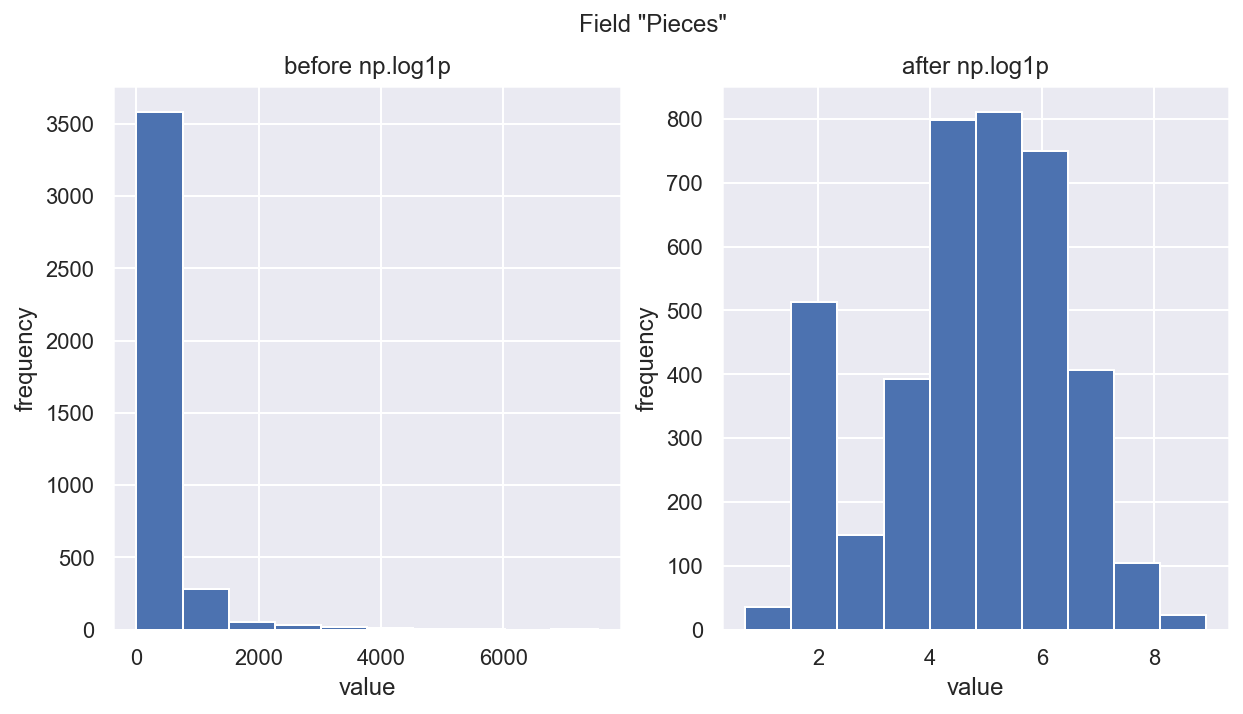

In [60]:
field = "Pieces"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

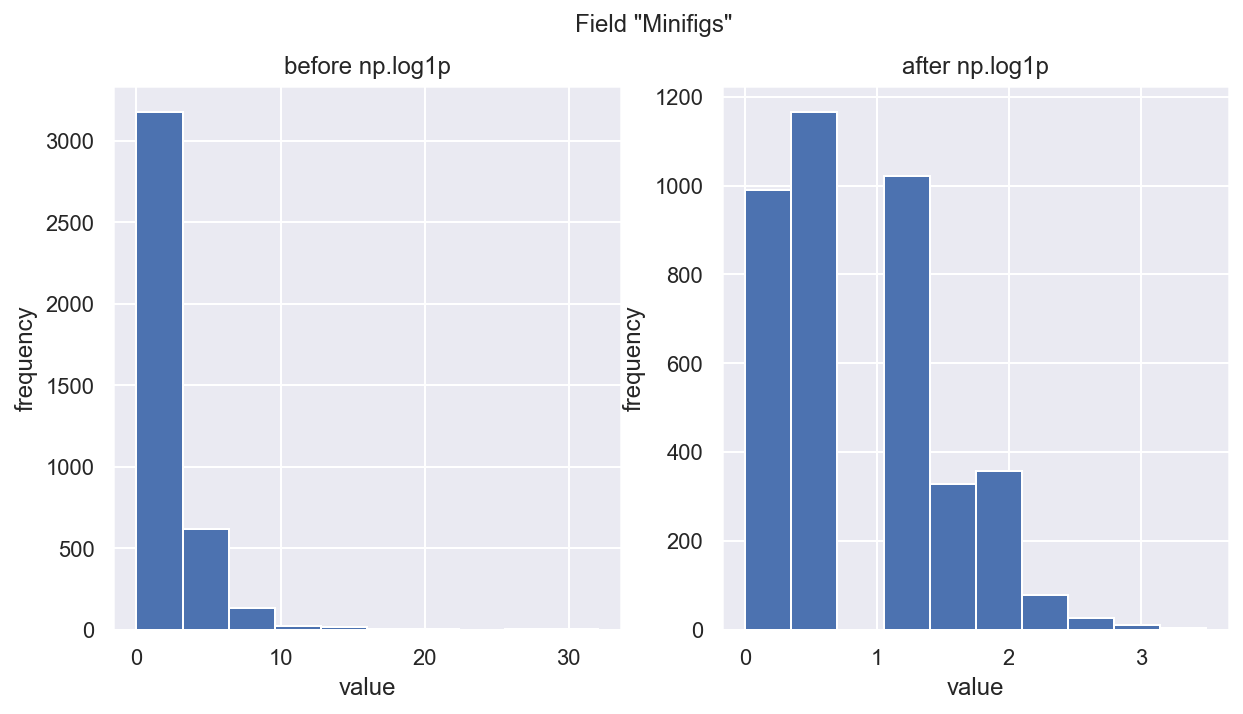

In [61]:
#The above histogram suggests we should log transform the 'pieces' column and others that have skewed data
#We won't do this for the price fields, as those will be used in other ways later

#eg

field = "Minifigs"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));



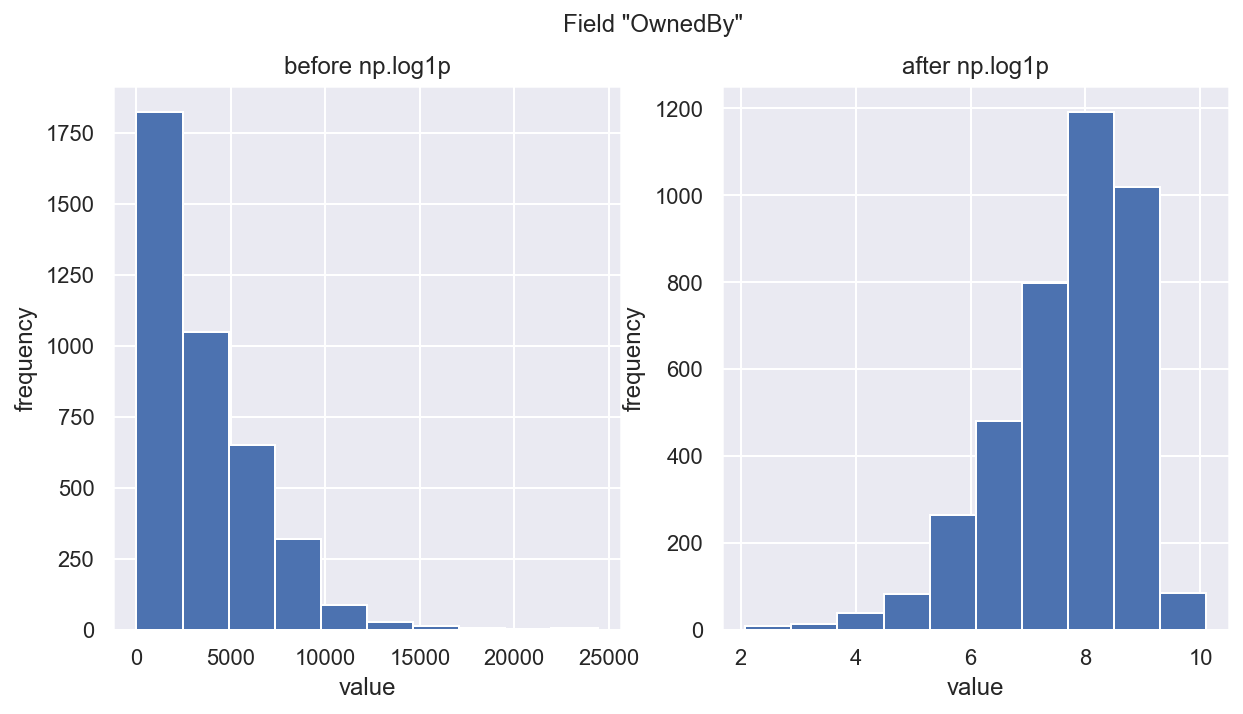

In [62]:
field = "OwnedBy"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

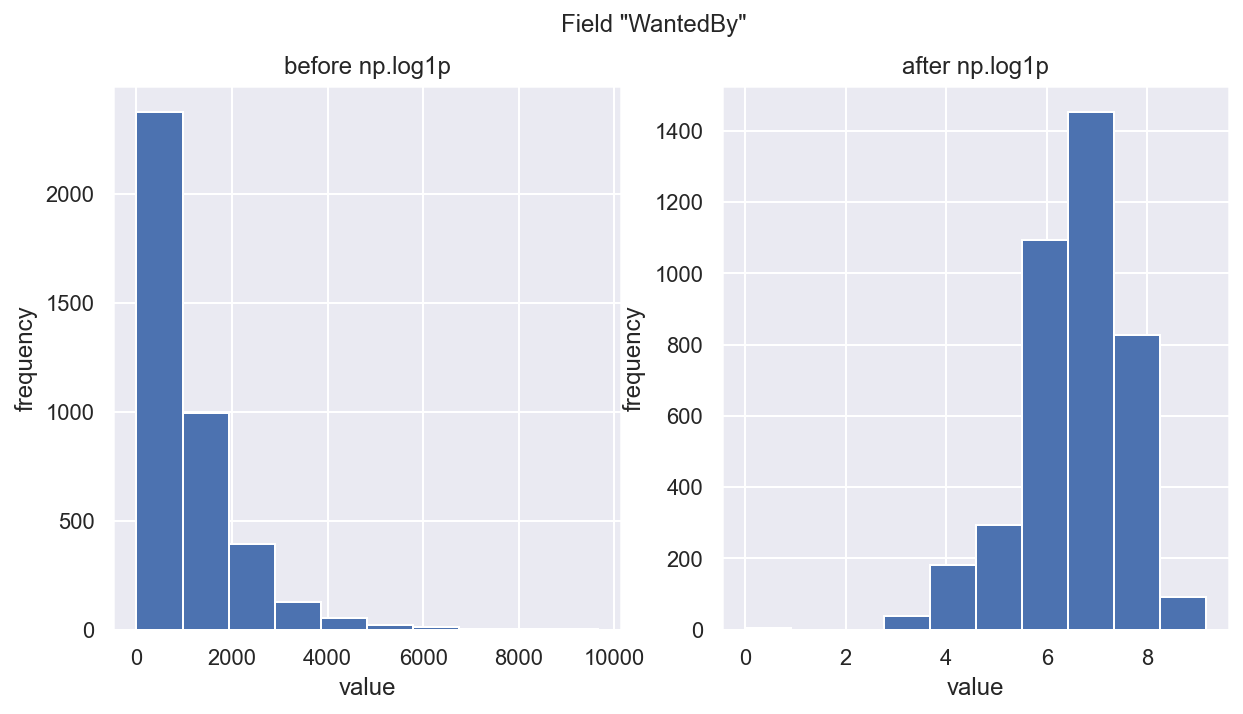

In [63]:
field = "WantedBy"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [64]:
L = []
for x in df.columns: 
    if x in ['OwnedBy', 'WantedBy', 'Pieces', 'Year', 'Minifigs']: 
        L.append(x) 
print (L)


['Year', 'Minifigs', 'Pieces', 'OwnedBy', 'WantedBy']


In [65]:
skew_vals2 = df2[L].skew()
skew_limit2 = 0.75 # define a limit above which we will log transform
skew_cols2 = (skew_vals2
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit2)))

skew_cols2


,Skew
Pieces,4.696148
Minifigs,3.337310
WantedBy,2.268152
OwnedBy,1.438491


In [66]:
for col in skew_cols2.index.values:
    if col == "SalePrice":
        continue
    df2[col] = df2[col].apply(np.log1p)

In [67]:
df2.head()

,Year,Minifigs,Pieces,UKPrice,USPrice,CAPrice,EUPrice,OwnedBy,WantedBy,Disney,...,Subtheme_Trains,Subtheme_Ultimate,Subtheme_Ultimate Collector Series,Subtheme_Ultimate Spider-Man,Subtheme_Valentine's Day,Subtheme_Vehicles,Subtheme_Vet,Subtheme_Volcano Explorers,Subtheme_Winter Village,Subtheme_Zoo
0,2013,0.000000,7.080868,99.99,129.99,159.990000,119.990000,8.002694,7.745868,0,...,0,0,0,0,0,0,0,0,0,0
1,2013,0.000000,5.846439,29.99,34.99,44.990000,34.990000,8.432289,7.698483,0,...,0,0,0,0,0,0,0,0,0,0
2,2013,0.000000,6.393591,49.99,49.99,59.990000,49.990000,8.297544,7.727535,0,...,0,0,0,0,0,0,0,0,0,0
3,2013,0.000000,7.099202,159.99,159.99,199.342139,159.990000,7.917172,7.531016,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,1.386294,5.288267,14.99,19.99,24.990000,19.336961,6.572283,5.480639,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 3981
Columns: 268 entries, Year to Subtheme_Zoo
dtypes: float64(8), int64(7), uint8(253)
memory usage: 1.4 MB


In [69]:
#Considered changing minifigures and piece counts to show how much they vary from the mean within their theme.
#But was unsure what this would add in this situation.

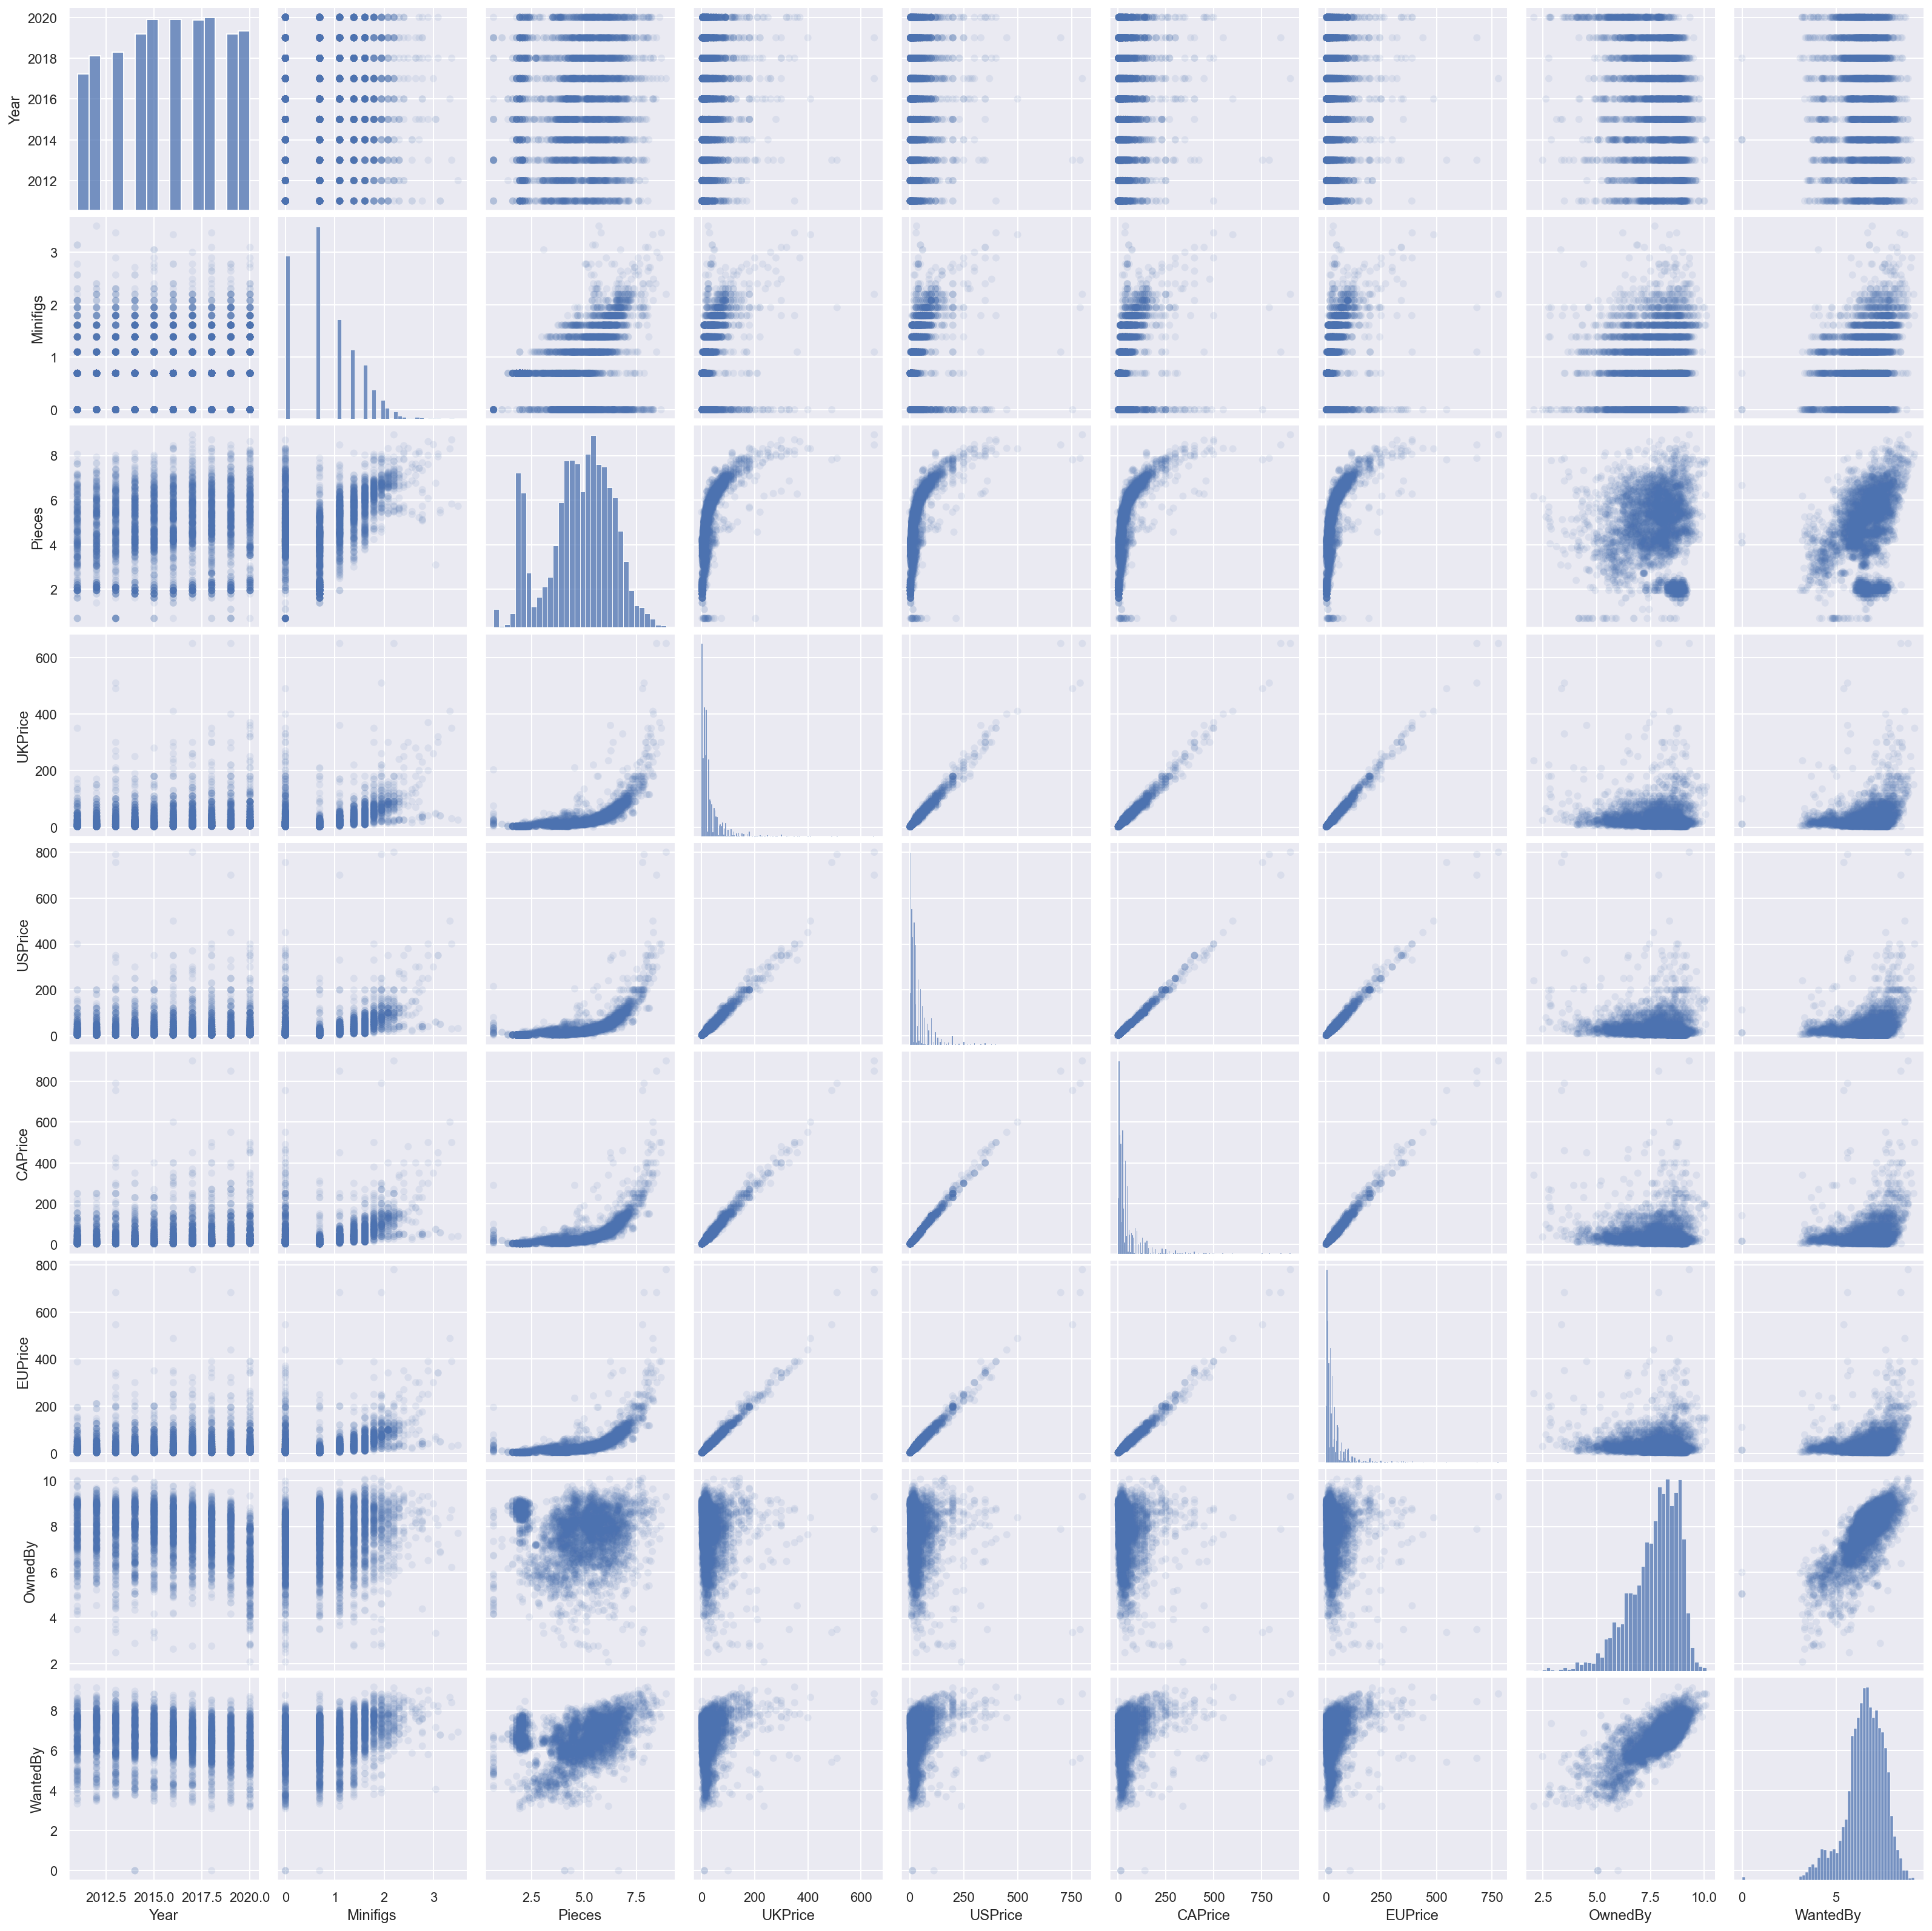

In [70]:
#Now look at a pairsplot
#We will only look at the columns that are not limited to 1s and 0s.

smaller_df = df2.loc[:,['Year', 'Minifigs', 'Pieces', 
                      'UKPrice', 'USPrice', 'CAPrice', 
                      'EUPrice', 'OwnedBy','WantedBy']]
sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor='none'))

In [73]:
df2.describe().T

,Year,Minifigs,Pieces,UKPrice,USPrice,CAPrice,EUPrice,OwnedBy,WantedBy,Disney,...,Subtheme_Trains,Subtheme_Ultimate,Subtheme_Ultimate Collector Series,Subtheme_Ultimate Spider-Man,Subtheme_Valentine's Day,Subtheme_Vehicles,Subtheme_Vet,Subtheme_Volcano Explorers,Subtheme_Winter Village,Subtheme_Zoo
count,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,...,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000
mean,2015.715721,0.891441,4.756467,30.818247,36.036273,45.270218,35.205855,7.684140,6.555000,0.061527,...,0.005776,0.002511,0.003767,0.002260,0.002260,0.002260,0.002009,0.001507,0.002511,0.002009
std,2.778348,0.671785,1.584163,44.245572,52.621427,63.880414,49.816137,1.157399,1.031223,0.240324,...,0.075790,0.050056,0.061267,0.047493,0.047493,0.047493,0.044783,0.038793,0.050056,0.044783
min,2011.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,2.079442,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,0.693147,3.871201,7.990000,9.990000,12.990000,9.740000,7.035489,6.001415,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,0.693147,4.952293,17.990000,19.990000,24.990000,19.990000,7.913155,6.637258,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,1.386294,5.918894,39.990000,39.990000,49.990000,39.990000,8.561449,7.280525,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,3.496508,8.928243,649.990000,799.990000,899.990000,779.820000,10.102379,9.174920,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


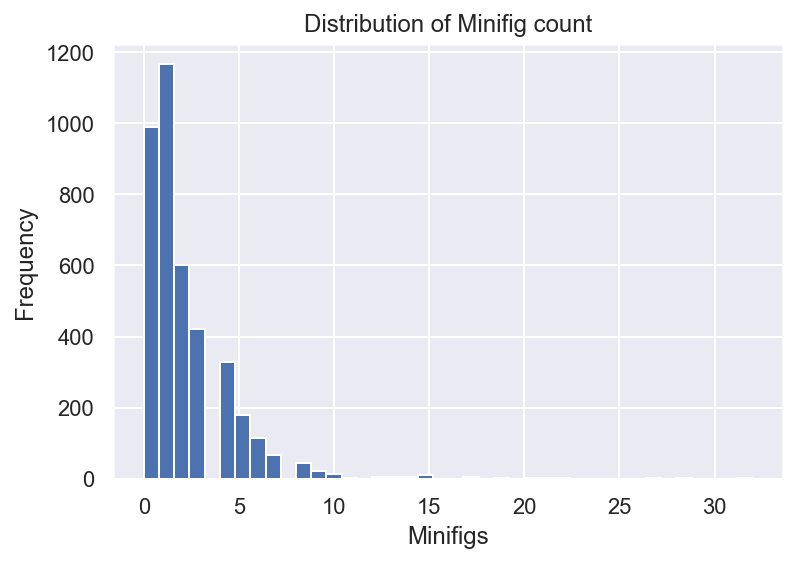

In [86]:
ax = plt.axes()
ax.hist(df.Minifigs, bins=40);

ax.set(xlabel='Minifigs', 
       ylabel='Frequency',
       title='Distribution of Minifig count');

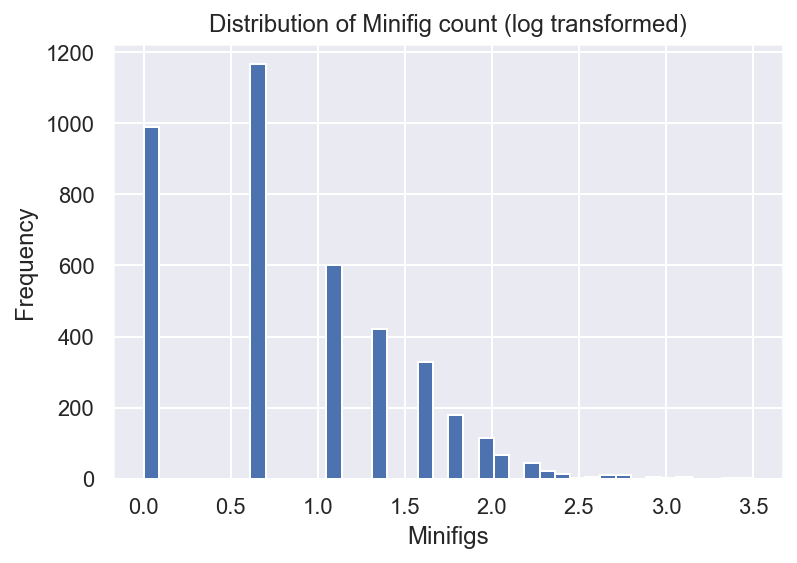

In [87]:
ax = plt.axes()
ax.hist(df2.Minifigs, bins=40);

ax.set(xlabel='Minifigs', 
       ylabel='Frequency',
       title='Distribution of Minifig count (log transformed)');

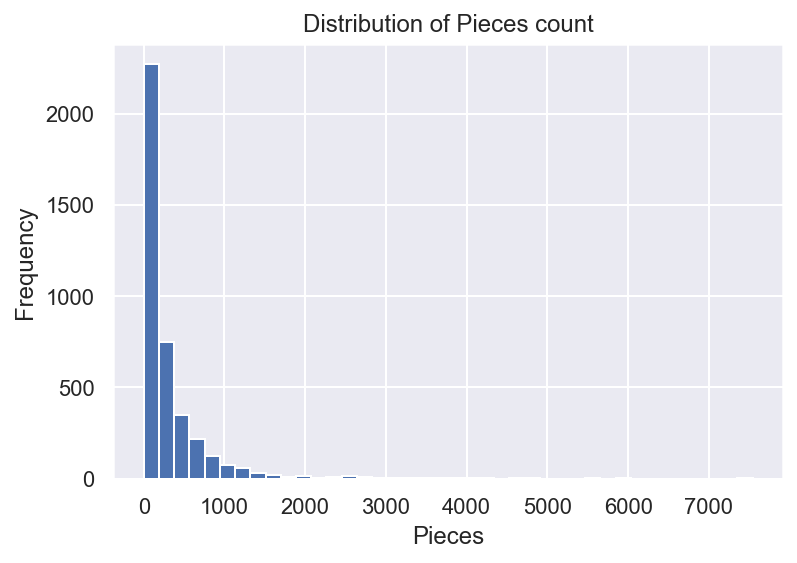

In [89]:
ax = plt.axes()
ax.hist(df.Pieces, bins=40);

ax.set(xlabel='Pieces', 
       ylabel='Frequency',
       title='Distribution of Pieces count');

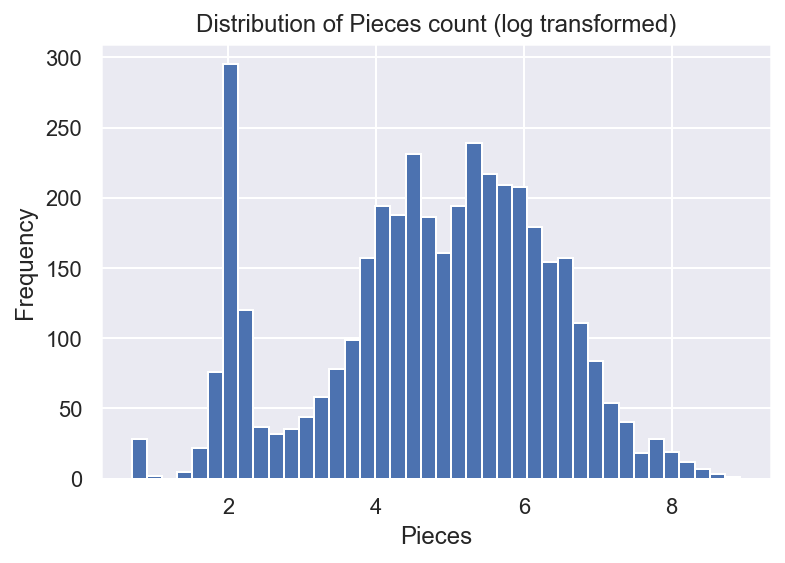

In [94]:
ax = plt.axes()
ax.hist(df2.Pieces, bins=40);

ax.set(xlabel='Pieces', 
       ylabel='Frequency',
       title='Distribution of Pieces count (log transformed)');

In [105]:
#First select our data from 2011 and 2020

sets_2011 = df2.loc[df['Year'] == 2011]
sets_2011 = sets_2011[['Pieces']]
sets_2020 = df2.loc[df['Year'] == 2020]
sets_2020 = sets_2020[['Pieces']]

In [107]:
#calculate the mean number of pieces each year
sets_2011_mean_pieces = sets_2011["Pieces"].mean()
sets_2020_mean_pieces = sets_2020["Pieces"].mean()

print("2011 mean of pieces: ", sets_2011_mean_pieces)
print("2020 mean of pieces: ", sets_2020_mean_pieces)

2011 mean of pieces:  4.342928399832589
2020 mean of pieces:  5.063402950409442


In [108]:
#calculate the std of the pieces each year
sets_2011_std_pieces = sets_2011["Pieces"].std()
sets_2020_std_pieces = sets_2020["Pieces"].std()

print("2011 std of pieces: ", sets_2011_std_pieces)
print("2020 std of pieces: ", sets_2020_std_pieces)

2011 std of pieces:  1.6061282906456205
2020 std of pieces:  1.6000627928740678


In [110]:
#import t-test
from scipy.stats import ttest_ind



ttest,pval = ttest_ind(sets_2011,sets_2020)
print("p-value",pval)
if pval <0.01:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value [3.61903535e-09]
we reject null hypothesis


In [111]:
#Export data set

df2.to_csv(r'data/lego_sets_data_cleaned.csv', index = False)